# Medius Health Data Science Challenge
By Arwa Siddiqui

#### Data Description: 
1. Dataset is provided in “data” folder. Each file in the data folder is considered as a document.
2. There are 300 documents.
3. Each document has some text information.

#### Task Description: 
Grouping documents with the same semantic description into clusters. 
1. Process the text data in each document/file using NLP, data processing, text mining.
3. Develop a model to partition the data into multiple clusters. It is required to develop the end-to-end model in python instead of using any data clustering libraries or pre-trained models.

The **outcome** of the model: 
1. Number of clusters and the data points in each cluster. 
2. Report the number of clusters found in the data.
3. Find out the topics of each cluster. (You can run any benchmark off-the-shelf topic modelling algorithm like Latent Dirichlet Allocation (LDA) or PLSA)
4. If possible, visualize the cluster. (bonus point)

## Load imports 

In [1]:
# Import libraries 
import os
import re
from csv import reader
import numpy as np
import pandas as pd
import random as rd
from collections import defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm
%matplotlib inline

import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import sklearn 
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import gensim
from gensim import corpora, models


Bad key "text.kerning_factor" on line 4 in
C:\Users\arwas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# Process Text Documents

In [2]:
# Access documents from Dataset
# Get a list of all files under the current directory
flist = []
for root, dirs, files in os.walk('data/'):
    flist += [os.path.join(root, f) for f in files]
flist.pop(0)
print("Number of documents:", len(flist))

Number of documents: 300


In [3]:
# Read documents into one document (i.e. list)
my_dir_path = "OneDrive/Desktop/Medius Health Challenge/Medius-Health-Challenge/data"
results = defaultdict(list)
for file in flist:
    with open(file, "r") as file_open:
        results["filename"].append(file.replace("data/", ""))
        results["text"].append(file_open.read())
df = pd.DataFrame(results)
df.head()

,filename,text
0,176869,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....
1,176878,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....
2,176881,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....
3,176884,Xref: cantaloupe.srv.cs.cmu.edu misc.headlines...
4,176886,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....


In [4]:
# Process documents
documents = re.split("[[0-9]+]|\n|\t|\\\\n|\\\\t", str(df['text']))
tokenizer = RegexpTokenizer(r'\w+')
#tokens = word_tokenize(raw)
tokens = tokenizer.tokenize(str(documents))
processed_docs = nltk.sent_tokenize(str(documents))

# Lower case all words and make sorted vocabulary 
raw_words = [w.lower() for w in tokens]
stop_words = set(stopwords.words("english"))
new_words = []
for w in raw_words:
    if w not in stop_words:
        new_words.append(w)
        
remove_words = ['edu', 'com', 'cmu', 'cs', 'cantaloupe', 'srv', 'newsgroups', 'cantaloupe', 
               'xref', 'subject', 'id', 'message', 'from', 'date', 'sender', 
               'references', 'organization', 'lines', 'path']
words = []
for w in new_words:  
    if w not in remove_words:
        words.append(w)
        
p_stemmer = PorterStemmer()
texts = [p_stemmer.stem(i) for i in words]

C:\Users\arwas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Possible nested set at position 1
  


In [5]:
# Plot highest frequency of words
fdist = FreqDist(texts)
fdist.most_common(10)

[('polit', 34),
 ('talk', 33),
 ('cantal', 12),
 ('gun', 11),
 ('crabappl', 8),
 ('misc', 7),
 ('magnesium', 7),
 ('club', 7),
 ('alt', 6),
 ('4', 3)]

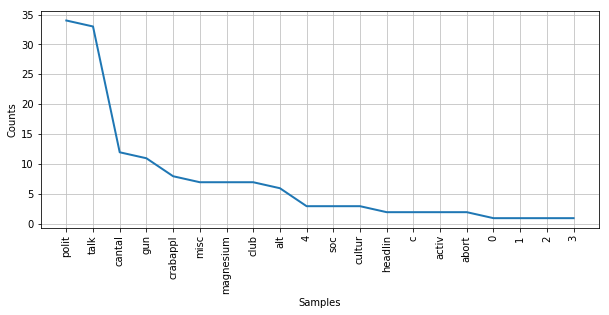

In [6]:
figure(figsize=(10, 4))
fdist.plot(20, cumulative=False)
plt.show()

In [7]:
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.95,
                             max_features = 8000,
                             stop_words='english')
X = vectorizer.fit_transform(texts)

## Building K-Means Clustering model from scratch 
The K-Means clustering algorithm is built below but due to large "X" (TF-IDF output), this cannot be run on the original "X" due to memory issues and type of "X" output. Therefore, a randomised and simplified numeric dataset is built to show how the KMeans clustering algorithm works, without the use of any clustering libraries.   

Implementing K-Means clustering:            
Step 1: Load data                    
Step 2: Calculate Euclidean distance - write a function and call it      
Step 3: Write code for K-Means clustering (and call Euclidean distance function)      
Step 4: Plotting clusters

To properly build a K-Means model, the _sklearn_'s _Kmeans_ library was used to continue the clustering analysis, using "X". 

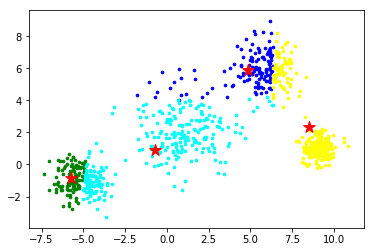

In [8]:
# Preprocessing to build randomised data as example
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed(5)
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4
data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

k = 4
c = data.shape[1]
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean


# Step 1: Load data
df = pd.DataFrame(data)
df.shape


# Step 2: Function for Euclidean distance
def E_dist(data1, data2):
    data1 = np.array(data1) 
    data2 = np.array(data2)
    return np.linalg.norm(data1 - data2)


# Step 3: Implementing KNN Clustering 
k = 4
n = data.shape[0]
colors=['green', 'blue', 'yellow', 'cyan']
c = data.shape[1]

centers_old = np.zeros(centers.shape)
centers_new = centers  # Store new centers
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = E_dist(centers_new, centers_old)
while error != 0:  # Update everytime a new center is created
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    clusters = np.argmin(distances, axis = 1)
    centers_old = centers_new

    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
        point=data[clusters == i]
        plt.scatter(point[:,0], point[:,1], s=7, c=colors[i])
    error = E_dist(centers_new, centers_old)
centers_new 

# Step 4: Plot clusters
colors=['green', 'blue', 'yellow', 'cyan']
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='red', edgecolor='red', s=150)

## Building K-Means model with sklearn library
Now that an example of a simple numerical dataset has been used, a K-Means clustering library will be used to conduct the analysis on the text data ("X"). 

C:\Users\arwas\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\arwas\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\arwas\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\arwas\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  return_n_iter=True)


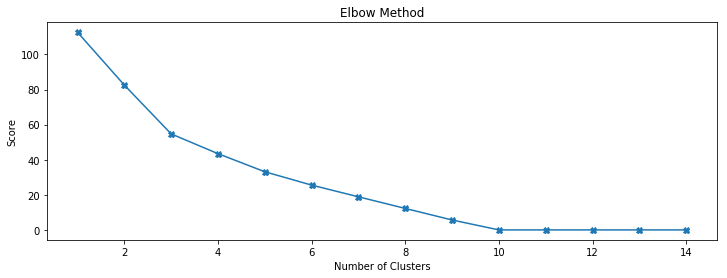

In [9]:
# Using KMeans library, find the optimal no. of clusters (Elbow Method)
number_clusters = range(1, 15)
score = []

for i in number_clusters:
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(X)
    score.append(kmeans.inertia_)

figure(figsize=(12, 4))
plt.plot(number_clusters, score, marker='X')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

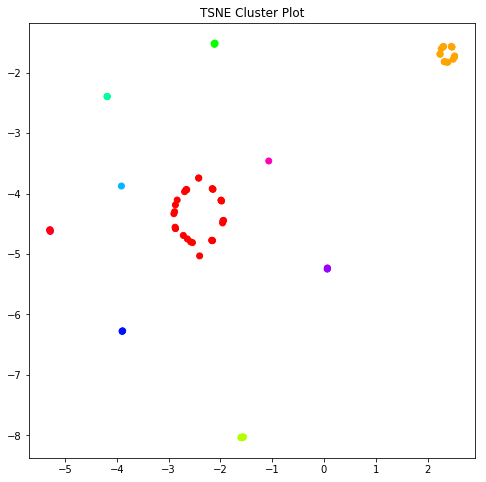

In [10]:
# Plotting clusters on TSNE plot
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(X)

def plot_tsne(data, labels, num):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=num, replace=False)
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=9).fit_transform(data[max_items,:].todense()))
    
    idx = np.random.choice(range(pca.shape[0]), size=num, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    figure(figsize=(8, 8))
    plt.scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    plt.title('TSNE Cluster Plot')
    
plot_tsne(X, clusters, 80)

## Implementing LDA to find topics

In [11]:
texts = [t.split() for t in texts]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

no_topics = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=no_topics, id2word = dictionary, passes=20)
print(ldamodel.print_topics(num_topics=no_topics, num_words=1))

[(0, '0.302*"gun"'), (1, '0.292*"crabappl"'), (2, '0.571*"polit"'), (3, '0.605*"talk"'), (4, '0.112*"c"'), (5, '0.056*"15"'), (6, '0.137*"soc"'), (7, '0.327*"misc"'), (8, '0.370*"cantal"'), (9, '0.276*"club"')]


In [12]:
labels = vectorizer.get_feature_names()

In [13]:
df = pd.DataFrame(X.todense()).groupby(clusters).mean()
for i, r in df.iterrows():
    print('\nCluster {}'.format(i))
    print(','.join([labels[t] for t in np.argsort(r)[-1:]]))


Cluster 0
talk

Cluster 1
talk

Cluster 2
polit

Cluster 3
cantal

Cluster 4
gun

Cluster 5
crabappl

Cluster 6
misc

Cluster 7
club

Cluster 8
alt

Cluster 9
magnesium
